In [29]:
# Loading required Python libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, cross_val_score
import numpy as np

In [30]:
# Loading digits dataset from sklearn
data = datasets.load_breast_cancer()

# Features
X = data.data

# Target
y = data.target

# Dataset description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [31]:
# Displaying posible target values
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [32]:
# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
# Loading classifier classifier
classifier = SVC()

In [34]:
# Function to train and evaluate a classifier
def classifier_eval(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

# Function to get the learning curve of a model
def get_learning_curve(classifier, X_train, y_train):
    N, train_score, val_score = learning_curve(classifier, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, num=10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[ 51  12]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89        63
           1       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



Scores: [0.9        0.8625     0.9375     0.88607595 0.91139241]
Accuracy: 0.89949 (+/- 0.05008)


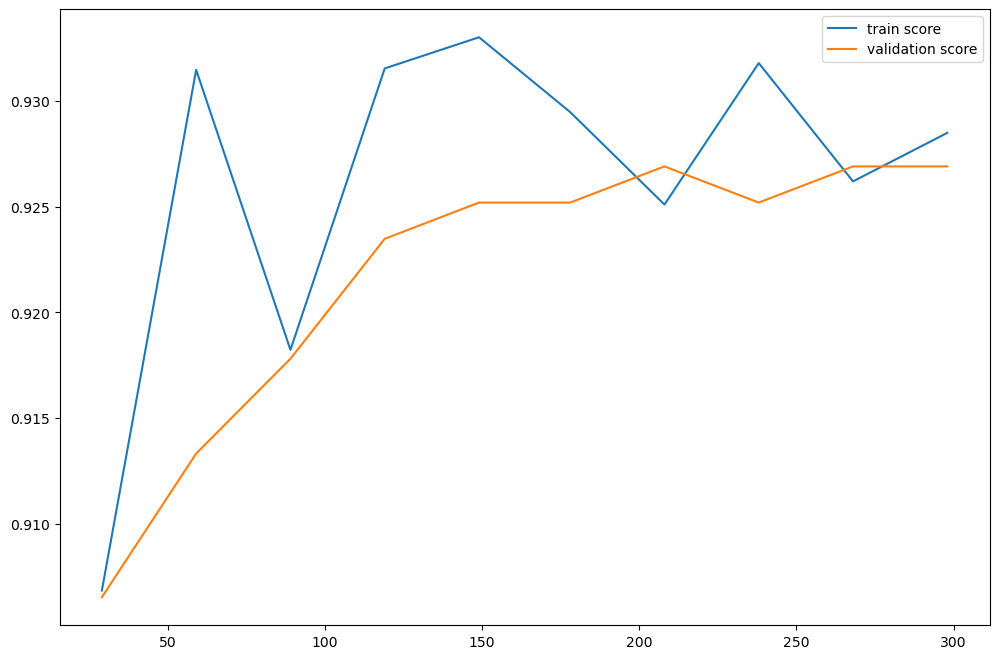

In [35]:
classifier_eval(classifier, X_train, y_train, X_test, y_test)

# Classifier evaluation via cross validation
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Displaying the scores for each cross validation
print("Scores:", scores)

# Displaying classifier accuracy
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

get_learning_curve(classifier, X_train, y_train)

In [36]:
# GridSearchCV
pgrid = {"C": [0.1, 1, 10, 100, 1000],
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Best score: " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("C: " + str(grid_search.best_estimator_.C))
print("Kernel: " + str(grid_search.best_estimator_.kernel))

Best score: 0.9415204678362573
C: 0.1
Kernel: linear


In [37]:
classifier_best_params = SVC(**grid_search.best_params_) 

[[ 61   2]
 [  8 100]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        63
           1       0.98      0.93      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171

Scores: [0.975      0.925      0.95       0.97468354 0.97468354]
Accuracy: 0.95987 (+/- 0.03981)


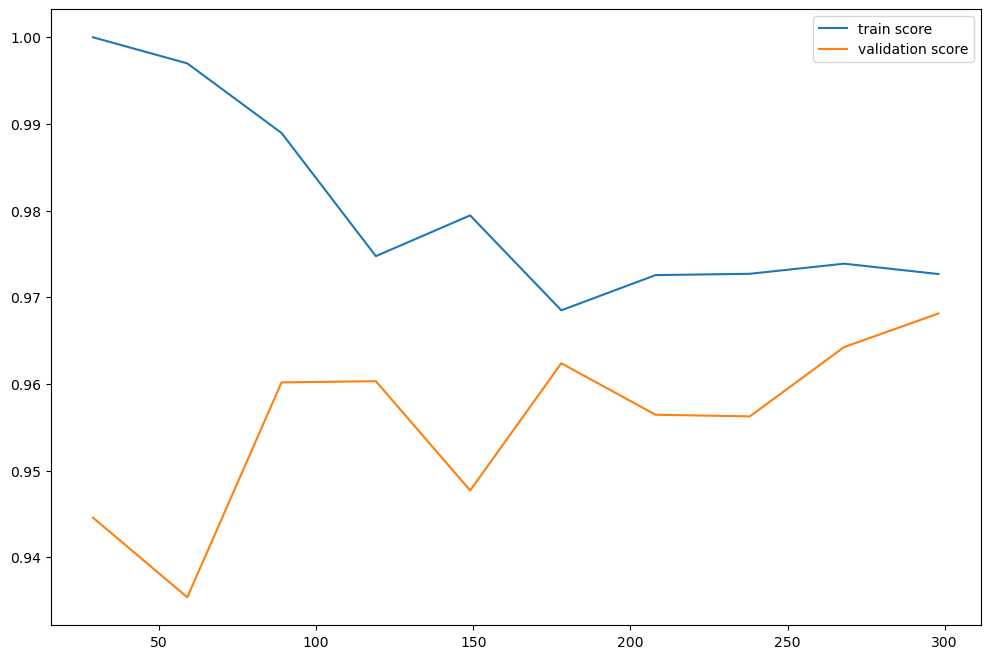

In [38]:
classifier_eval(classifier_best_params, X_train, y_train, X_test, y_test)

# Model evaluation via cross validation
scores = cross_val_score(classifier_best_params, X_train, y_train, cv=5)

# Displaying the scores for each cross validation
print("Scores:", scores)

# Displaying model accuracy
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

get_learning_curve(classifier_best_params, X_train, y_train)